In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Data

In [40]:
file_path="data/rideshare_kaggle.csv"
cab_rides_data=pd.read_csv(file_path)

In [41]:
cab_rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [42]:
cab_rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Basic Data Checks

In [43]:
missing_values = cab_rides_data.isnull().sum()

In [44]:
missing_values

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [45]:
missing_values_per_cab_type=cab_rides_data.groupby('cab_type')['price'].apply(lambda x:x.isnull().sum())

In [46]:
missing_values_per_cab_type

cab_type
Lyft        0
Uber    55095
Name: price, dtype: int64

In [47]:
mean_uber_price = cab_rides_data[cab_rides_data['cab_type'] == 'Uber']['price'].mean()
cab_rides_data['price'] = cab_rides_data['price'].fillna(mean_uber_price)

In [48]:
missing_values_per_cab_type=cab_rides_data.groupby('cab_type')['price'].apply(lambda x:x.isnull().sum())
missing_values_per_cab_type

cab_type
Lyft    0
Uber    0
Name: price, dtype: int64

In [49]:
cab_rides_data['is_rain'] = cab_rides_data['short_summary'].str.contains('rain', case=False).astype(int)

In [50]:
cab_rides_data['datetime'] = pd.to_datetime(cab_rides_data['datetime'], format='%Y-%m-%d %H:%M:%S')

In [51]:
cab_rides_data['date'] = cab_rides_data['datetime'].dt.date
cab_rides_data['time'] = cab_rides_data['datetime'].dt.time
cab_rides_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0,2018-12-16,09:30:07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,2018-11-27,02:00:23
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,2018-11-28,01:00:22
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0,2018-11-30,04:53:02
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0,2018-11-29,03:49:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05


In [52]:
# Create "odd_time" column
cab_rides_data['odd_time'] = cab_rides_data['time'].apply(lambda x: 1 if x.hour < 6 else 0)

# Create "peak_time" column
cab_rides_data['peak_time'] = cab_rides_data['time'].apply(lambda x: 1 if (x.hour >= 8 and x.hour <= 10) or (x.hour >= 16 and x.hour <= 19) else 0)

# Print the updated dataframe
cab_rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time,peak_time
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544968800,33.73,1545012000,38.07,1544958000,0,2018-12-16,09:30:07,0,1
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,36.20,1543291200,43.92,1543251600,1,2018-11-27,02:00:23,1,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543320000,31.04,1543377600,44.12,1543320000,0,2018-11-28,01:00:22,1,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543510800,30.30,1543550400,38.53,1543510800,0,2018-11-30,04:53:02,1,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,29.11,1543392000,35.75,1543420800,0,2018-11-29,03:49:20,1,0


In [53]:
#sorting by datetime column
cab_rides_data = cab_rides_data.sort_values(by='datetime')

In [54]:
cab_rides_data['day_of_week'] = cab_rides_data['datetime'].dt.day_name()

In [55]:
# Create "is_weekend" column
cab_rides_data['is_weekend'] = cab_rides_data['day_of_week'].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0)
cab_rides_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time,peak_time,day_of_week,is_weekend
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34918,e299c3bf-a429-4b19-af4a-ebd8e9ad74f7,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Financial District,Haymarket Square,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
215397,20caa061-2ded-49f8-882b-1e7eae6285ff,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Fenway,Theatre District,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
166550,7f1cbf41-2136-4e37-889d-dd0dfff02d38,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Haymarket Square,Back Bay,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
290785,8c28dc35-c4a8-41e8-abe8-d5d65849448d,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Northeastern University,Beacon Hill,Lyft,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0


In [56]:
# Rename column 'cab_type' to 'cab_company', 'name' to 'cab_type', 'odd_time' to 'odd_time_of_travel' of cab_rides_data
cab_rides_data.rename(columns={
    'cab_type': 'cab_company',
    'odd_time': 'odd_time_of_travel'
}, inplace=True)

cab_rides_data.rename(columns={
    'name': 'cab_type'
}, inplace=True)


cab_rides_data.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_company,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time_of_travel,peak_time,day_of_week,is_weekend
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0


In [57]:
# Add a column which stores was the ride taken in day or night
cab_rides_data['is_night'] = cab_rides_data.apply(
    lambda row: not (row['sunriseTime'] <= row['datetime'].timestamp() <= row['sunsetTime']),
    axis=1
)

# Print the updated DataFrame
cab_rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_company,...,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time_of_travel,peak_time,day_of_week,is_weekend,is_night
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0,True
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0,True
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0,True
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0,True
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0,True


In [58]:
# Convert 0 to False and 1 to True in the specified columns

pd.set_option('future.no_silent_downcasting', True)  # Opt into the future behavior
columns_to_convert = ['peak_time', 'is_weekend', 'odd_time_of_travel', 'is_rain']

cab_rides_data[columns_to_convert] = cab_rides_data[columns_to_convert].apply(
    lambda col: col.replace({0: False, 1: True}).astype(bool)
)

cab_rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_company,...,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time_of_travel,peak_time,day_of_week,is_weekend,is_night
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,43.17,1543186800,False,2018-11-26,03:40:46,True,False,Monday,False,True
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,43.17,1543186800,False,2018-11-26,03:40:46,True,False,Monday,False,True
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,43.17,1543186800,False,2018-11-26,03:40:46,True,False,Monday,False,True
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,43.17,1543186800,False,2018-11-26,03:40:46,True,False,Monday,False,True
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,43.17,1543186800,False,2018-11-26,03:40:46,True,False,Monday,False,True


In [59]:
# Cleanup before selecting data
cab_rides_data['year'] = cab_rides_data['datetime'].dt.year
cab_rides_data['month'] = cab_rides_data['datetime'].dt.month
cab_rides_data['day'] = cab_rides_data['datetime'].dt.day
cab_rides_data['hour'] = cab_rides_data['datetime'].dt.hour
cab_rides_data['minute'] = cab_rides_data['datetime'].dt.minute
cab_rides_data['weekday'] = cab_rides_data['datetime'].dt.weekday

# Ensure boolean columns are explicitly cast to boolean type
cab_rides_data['is_night'] = cab_rides_data['is_night'].astype(bool)
cab_rides_data['is_rain'] = cab_rides_data['is_rain'].astype(bool)
cab_rides_data['is_weekend'] = cab_rides_data['is_weekend'].astype(bool)

print(cab_rides_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 693071 entries, 66422 to 166551
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int32         
 3   day                          693071 non-null  int32         
 4   month                        693071 non-null  int32         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_company                  693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  cab_type                   

In [60]:
# columns_to_include = [
#     'source', 'destination', 'cab_company', 'cab_type', 'price', 'distance',
#     'surge_multiplier', 'apparentTemperature', 'precipIntensity',
#     'day_of_week'
# ]

columns_to_include = [
    'source', 'destination', 'cab_company', 'cab_type', 'price', 'distance',
    'surge_multiplier', 'apparentTemperature', 'short_summary', 'precipIntensity',
    'precipProbability', 'uvIndex', 'visibility.1', 'is_night', 'precipIntensityMax',
    'is_rain', 'odd_time_of_travel', 'peak_time', 'day_of_week', 'is_weekend'
]

selected_features = cab_rides_data[columns_to_include]
print(selected_features.info())


<class 'pandas.core.frame.DataFrame'>
Index: 693071 entries, 66422 to 166551
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   source               693071 non-null  object 
 1   destination          693071 non-null  object 
 2   cab_company          693071 non-null  object 
 3   cab_type             693071 non-null  object 
 4   price                693071 non-null  float64
 5   distance             693071 non-null  float64
 6   surge_multiplier     693071 non-null  float64
 7   apparentTemperature  693071 non-null  float64
 8   short_summary        693071 non-null  object 
 9   precipIntensity      693071 non-null  float64
 10  precipProbability    693071 non-null  float64
 11  uvIndex              693071 non-null  int64  
 12  visibility.1         693071 non-null  float64
 13  is_night             693071 non-null  bool   
 14  precipIntensityMax   693071 non-null  float64
 15  is_rain           

## Visualization Pending

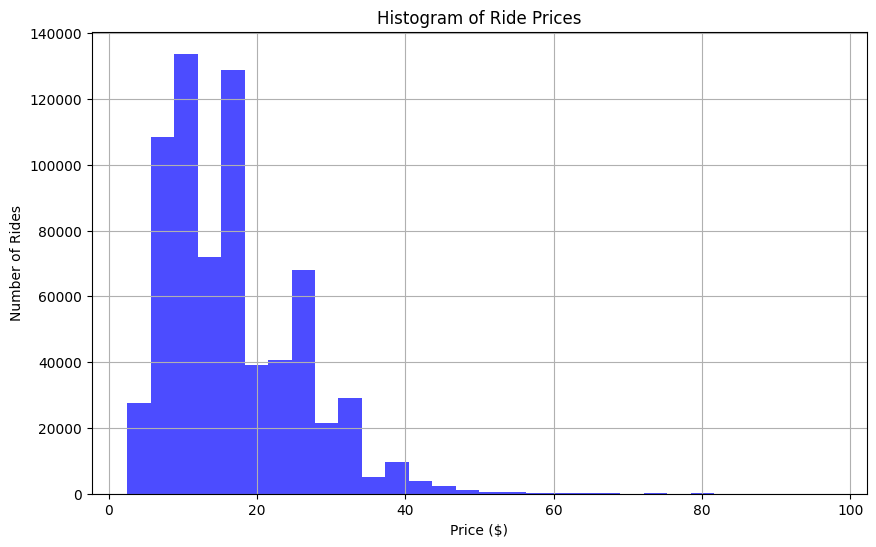

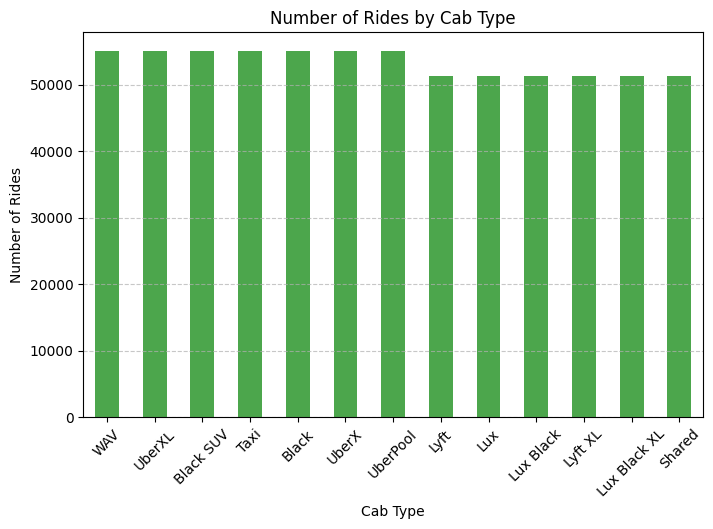

/var/folders/z1/fbf3jw4x2k17yv3z5f3l04jm0000gn/T/ipykernel_5628/3498181801.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  price_heatmap_data = cleaned_data.pivot_table(
/var/folders/z1/fbf3jw4x2k17yv3z5f3l04jm0000gn/T/ipykernel_5628/3498181801.py:38: FutureWarning: The provided callable <function mean at 0x110434670> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  price_heatmap_data = cleaned_data.pivot_table(


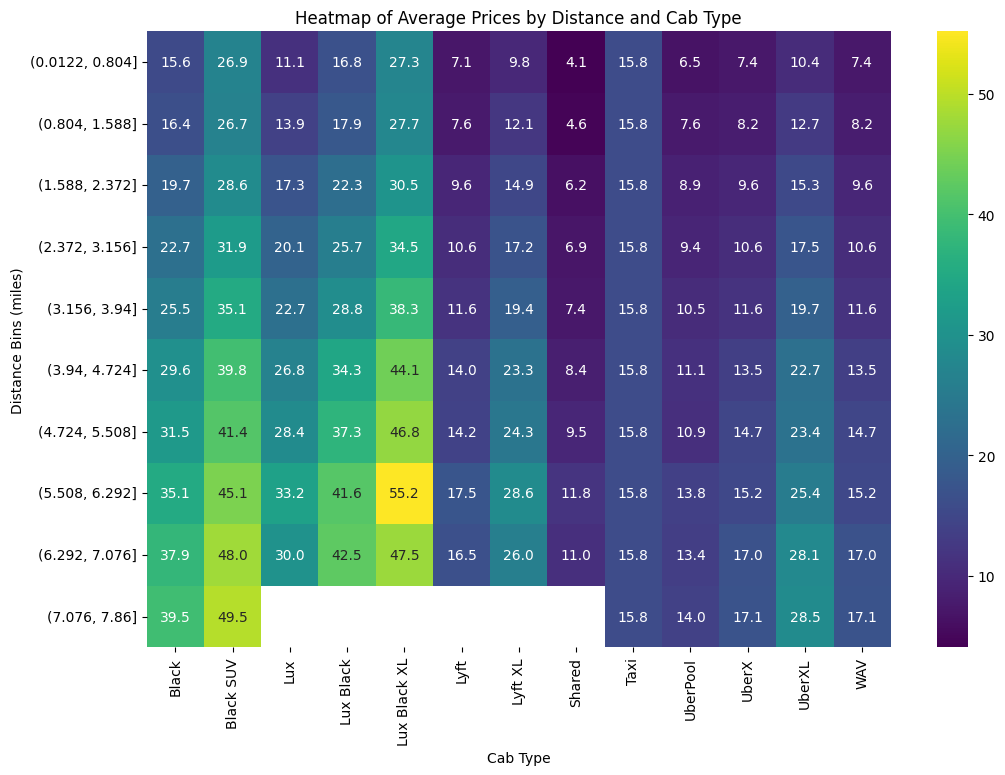

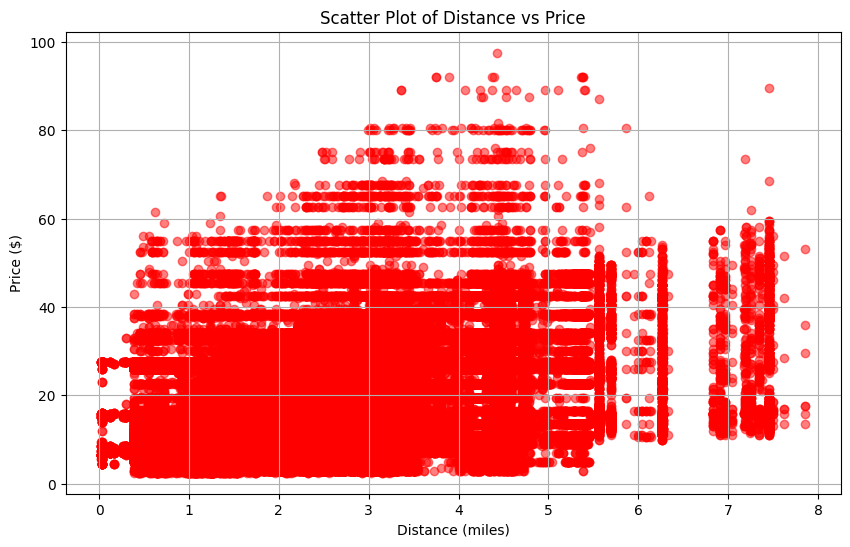

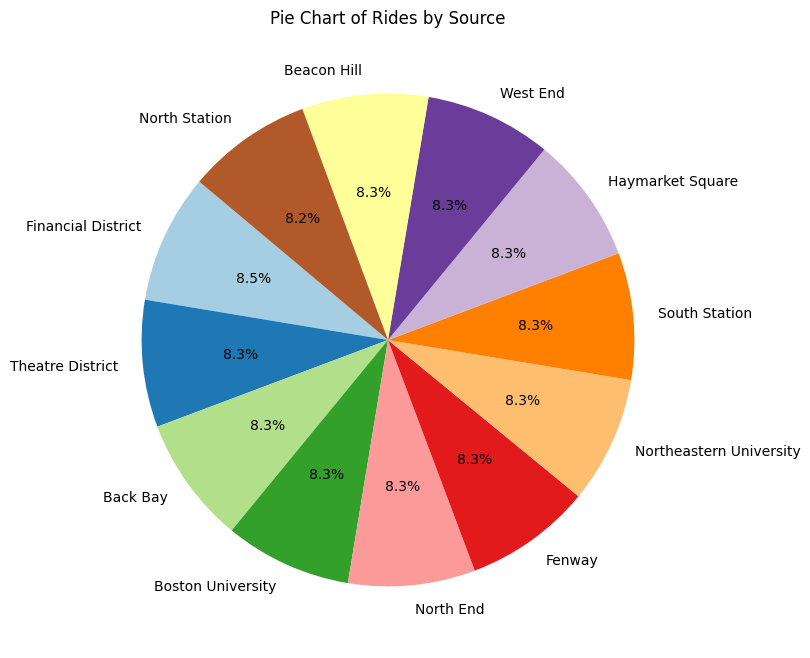

,total_rides,average_price,average_distance,average_surge
cab_type,,,,
Black,55095,20.523786,2.191399,1.000000
Black SUV,55096,30.286763,2.191378,1.000000
Lux,51235,17.771240,2.186968,1.037177
Lux Black,51235,23.062468,2.186968,1.037177
Lux Black XL,51235,32.324086,2.186968,1.037177
Lyft,51235,9.610885,2.186968,1.038045
Lyft XL,51235,15.309363,2.186968,1.038045
Shared,51233,6.029893,2.187012,1.000000
Taxi,55095,15.795343,2.191383,1.000000


In [61]:
import matplotlib.pyplot as plt

# Checking for any null values in the price column
price_nulls = cab_rides_data['price'].isnull().sum()

# Display the number of null values and unique values to decide on handling them
price_nulls, cab_rides_data['price'].describe()
# Removing rows with null prices
cleaned_data = cab_rides_data.dropna(subset=['price'])

# Creating a histogram of ride prices
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['price'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Ride Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()
# Creating a bar chart of cab types
cab_type_counts = cab_rides_data['cab_type'].value_counts()

plt.figure(figsize=(8, 5))
cab_type_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Number of Rides by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


import numpy as np

# Creating distance bins for better visualization
cleaned_data['distance_bins'] = pd.cut(cleaned_data['distance'], bins=10)

# Creating a pivot table to analyze prices across distances and cab types
price_heatmap_data = cleaned_data.pivot_table(
    values='price', 
    index='distance_bins', 
    columns='cab_type', 
    aggfunc=np.mean
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
plt.title('Heatmap of Average Prices by Distance and Cab Type')
sns.heatmap(price_heatmap_data, annot=True, fmt=".1f", cmap='viridis')
plt.xlabel('Cab Type')
plt.ylabel('Distance Bins (miles)')
plt.show()
# Creating a scatter plot of distance vs price
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['distance'], cleaned_data['price'], alpha=0.5, color='red')
plt.title('Scatter Plot of Distance vs Price')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Creating a pie chart of rides by source
source_counts = cleaned_data['source'].value_counts()

plt.figure(figsize=(10, 8))
source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Rides by Source')
plt.ylabel('')  # Removing the y-label as it's unnecessary for pie charts
plt.show()

# Grouping data by cab type to calculate the requested metrics
lyft_uber_analysis = cleaned_data.groupby('cab_type').agg(
    total_rides=('id', 'count'),
    average_price=('price', 'mean'),
    average_distance=('distance', 'mean'),
    average_surge=('surge_multiplier', 'mean')
)

lyft_uber_analysis





## Label Encoding

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [63]:
# Create a list of columns to encode
golden_data = selected_features.copy()
cols_to_encode = [col for col in golden_data.columns if col not in ['price']]

# Apply label encoding to each column
for col in cols_to_encode:
    golden_data[col] = label_encoder.fit_transform(golden_data[col])

    # Get the mapping from encoded values to original names
    mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

    # Print the mapping for the column
    print(f"Mapping for {col} column:")
    print(mapping,"\n")


Mapping for source column:
{np.int64(0): 'Back Bay', np.int64(1): 'Beacon Hill', np.int64(2): 'Boston University', np.int64(3): 'Fenway', np.int64(4): 'Financial District', np.int64(5): 'Haymarket Square', np.int64(6): 'North End', np.int64(7): 'North Station', np.int64(8): 'Northeastern University', np.int64(9): 'South Station', np.int64(10): 'Theatre District', np.int64(11): 'West End'} 

Mapping for destination column:
{np.int64(0): 'Back Bay', np.int64(1): 'Beacon Hill', np.int64(2): 'Boston University', np.int64(3): 'Fenway', np.int64(4): 'Financial District', np.int64(5): 'Haymarket Square', np.int64(6): 'North End', np.int64(7): 'North Station', np.int64(8): 'Northeastern University', np.int64(9): 'South Station', np.int64(10): 'Theatre District', np.int64(11): 'West End'} 

Mapping for cab_company column:
{np.int64(0): 'Lyft', np.int64(1): 'Uber'} 

Mapping for cab_type column:
{np.int64(0): 'Black', np.int64(1): 'Black SUV', np.int64(2): 'Lux', np.int64(3): 'Lux Black', np.int

## Creating Train and Test Data

In [64]:
target = 'price'

# Create feature matrix (X) and target vector (y)
X= golden_data.drop('price', axis=1)
y= golden_data['price']

# Convert categorical columns (e.g., is_rain, day_of_week) to numerical values
# X = pd.get_dummies(X, columns=['day_of_week', 'is_weekend'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (554456, 19)
X_test shape: (138615, 19)


## Linear Regression Model

In [65]:
# Linear Regression
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_linear))
print("R-squared (R2):", r2_score(y_test, y_pred_linear))

Linear Regression Results:
Mean Squared Error (MSE): 39.64242388372064
R-squared (R2): 0.5031938412993644


## RF Model

In [66]:
# Train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42, max_depth=20)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Results:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))

Random Forest Regressor Results:
Mean Squared Error (MSE): 2.713572933694258
R-squared (R2): 0.9659930041236386


/var/folders/z1/fbf3jw4x2k17yv3z5f3l04jm0000gn/T/ipykernel_5628/3648033721.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


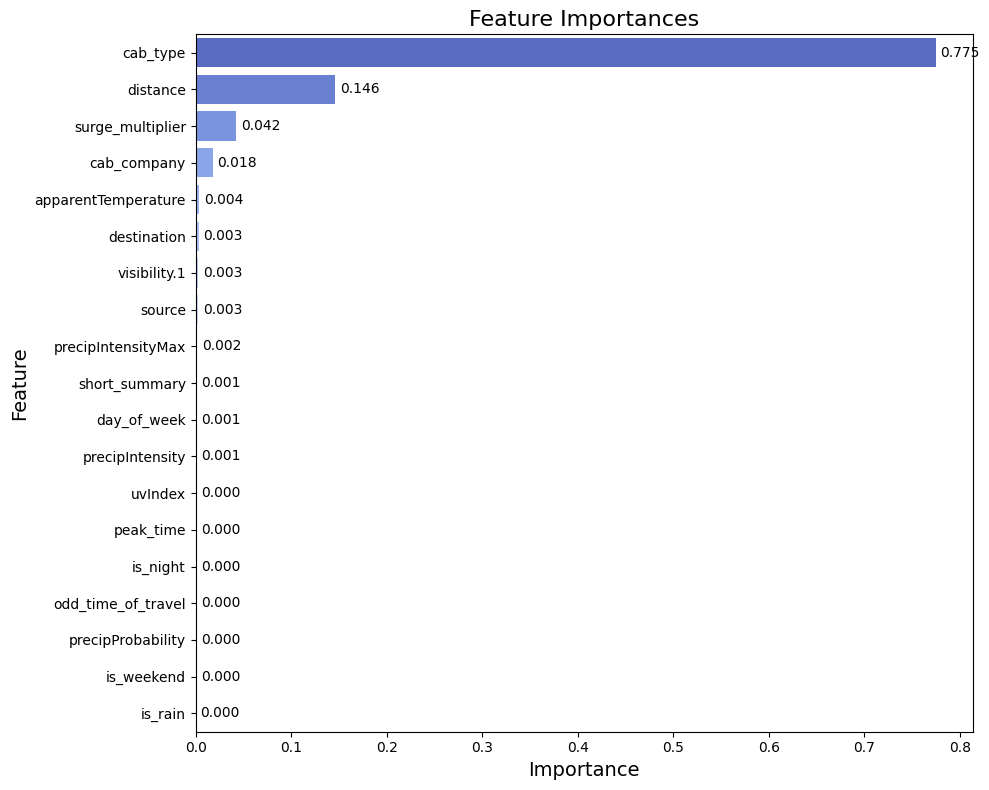

In [67]:
# Get feature importances and sort them in descending order
importances = random_forest_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(
    x=feature_importances['Importance'],
    y=feature_importances['Feature'],
    palette='coolwarm'  # Use a gradient color palette
)
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)

# Add annotations to each bar
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Decision Tree Regressor

In [91]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Optional: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

Mean Absolute Error (MAE): 1.205976149902875
Mean Squared Error (MSE): 4.676052568175625
R² Score: 0.9413988478330266

Feature Importances:
                Feature  Importance
3              cab_type    0.780258
4              distance    0.146635
5      surge_multiplier    0.041940
2           cab_company    0.007027
6   apparentTemperature    0.005510
11         visibility.1    0.003771
1           destination    0.003297
0                source    0.002961
13   precipIntensityMax    0.002389
7         short_summary    0.001350
17          day_of_week    0.001237
8       precipIntensity    0.000721
16            peak_time    0.000586
12             is_night    0.000581
10              uvIndex    0.000525
15   odd_time_of_travel    0.000449
18           is_weekend    0.000363
9     precipProbability    0.000348
14              is_rain    0.000051


Key Observations
Model Performance:

MAE: 
1.21
1.21 indicates that, on average, predictions are off by $1.21.
MSE: 
4.68
4.68, a relatively low value, suggests good accuracy for a regression model.
R²: 
0.94
0.94 is excellent, indicating that 94% of the variance in price is explained by the features.
Feature Importance:

The most important features for predicting the price are:
cab_type: 
78.03
%
78.03%
distance: 
14.66
%
14.66%
surge_multiplier: 
4.19
%
4.19%
Other features, such as cab_company (
0.7
%
0.7%) and apparentTemperature (
0.55
%
0.55%), contribute marginally.
Some features (e.g., is_rain, precipProbability, is_weekend) have negligible importance.
Feature Redundancy:

Features like is_rain, precipProbability, and others with near-zero importance might be unnecessary.

## Model Comparisons

Model Comparison:
Linear Regression - MSE: 39.64242388372064 | R2: 0.5031938412993644
Random Forest Regressor - MSE: 2.713572933694258 | R2: 0.9659930041236386
Decision Tree Regressor - MSE: 4.676052568175625 | R2: 0.9413988478330266


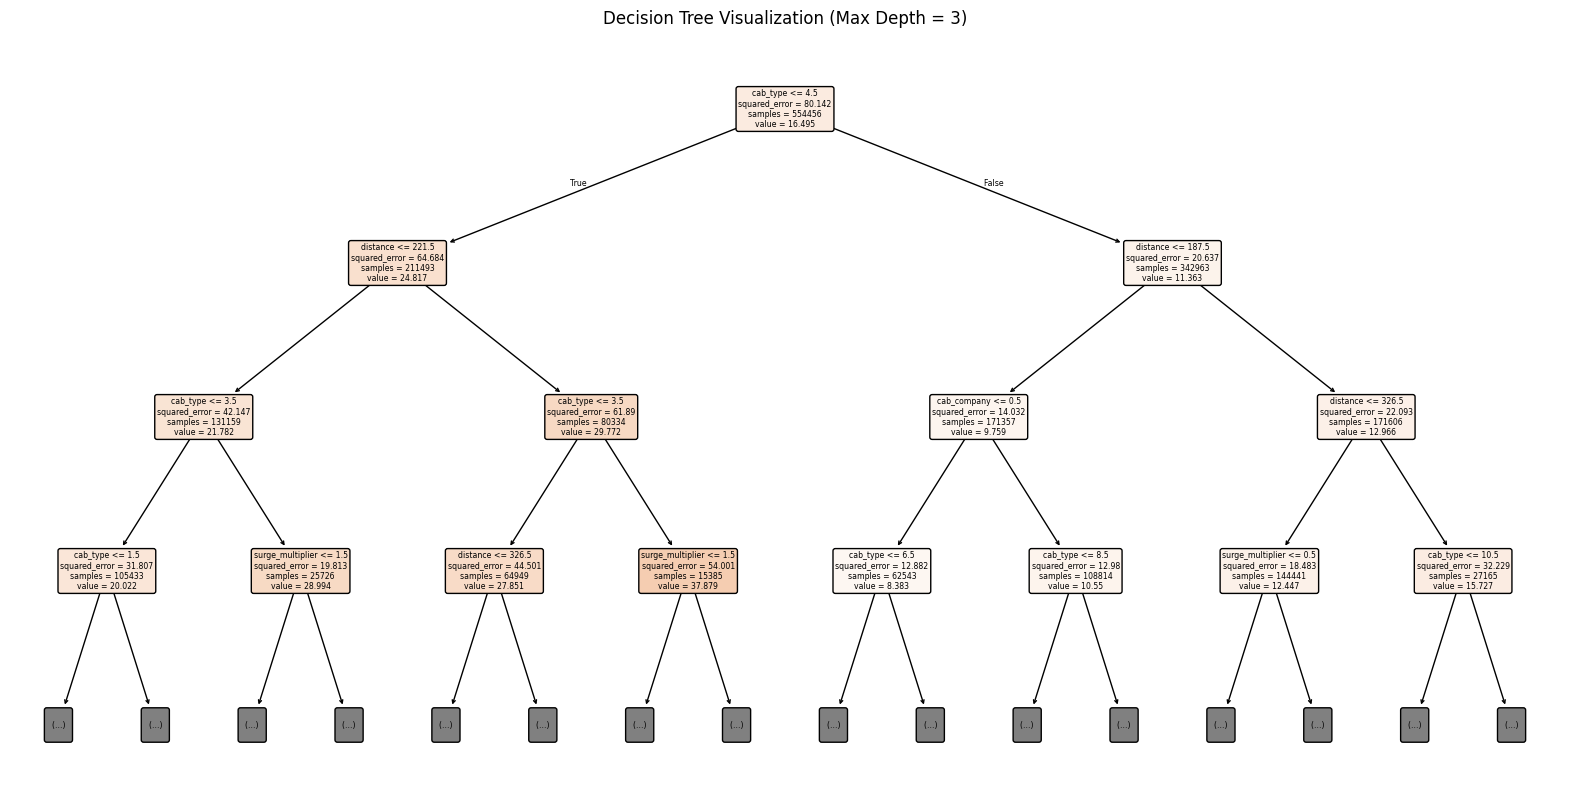


Decision Tree Rules:
|--- cab_type <= 4.50
|   |--- distance <= 221.50
|   |   |--- cab_type <= 3.50
|   |   |   |--- cab_type <= 1.50
|   |   |   |   |--- cab_type <= 0.50
|   |   |   |   |   |--- distance <= 135.50
|   |   |   |   |   |   |--- distance <= 105.50
|   |   |   |   |   |   |   |--- distance <= 81.50
|   |   |   |   |   |   |   |   |--- source <= 3.50
|   |   |   |   |   |   |   |   |   |--- destination <= 1.00
|   |   |   |   |   |   |   |   |   |   |--- short_summary <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [16.00]
|   |   |   |   |   |   |   |   |   |   |--- short_summary >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- destination >  1.00
|   |   |   |   |   |   |   |   |   |   |--- visibility.1 <= 215.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- visibility.1 >  215.50
|   |   |   |   |   

In [92]:
# Compare the models
print("Model Comparison:")
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_linear), "| R2:", r2_score(y_test, y_pred_linear))
print("Random Forest Regressor - MSE:", mean_squared_error(y_test, y_pred_rf), "| R2:", r2_score(y_test, y_pred_rf))
print("Decision Tree Regressor - MSE:", mean_squared_error(y_test, y_pred_dt), "| R2:", r2_score(y_test, y_pred_dt))
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

# Optional: Export textual representation of the tree
tree_rules = export_text(dt_model, feature_names=list(X_train.columns))
print("\nDecision Tree Rules:")
print(tree_rules)

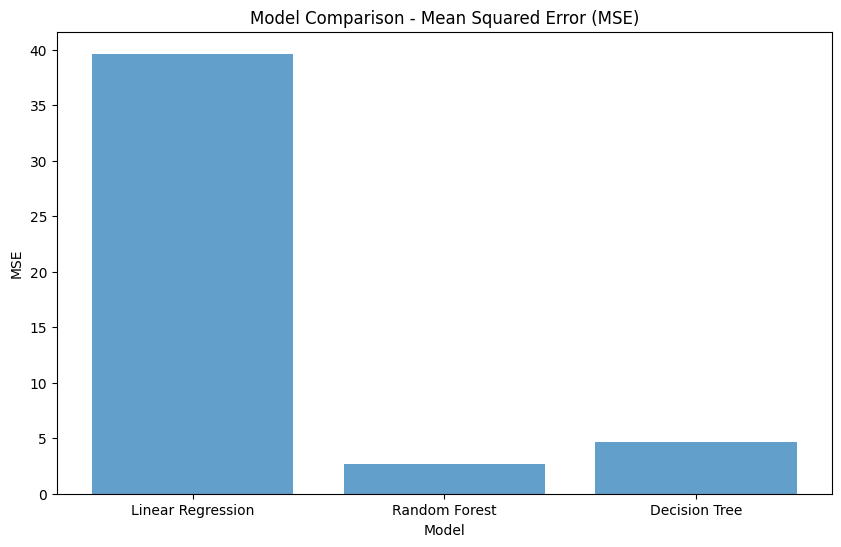

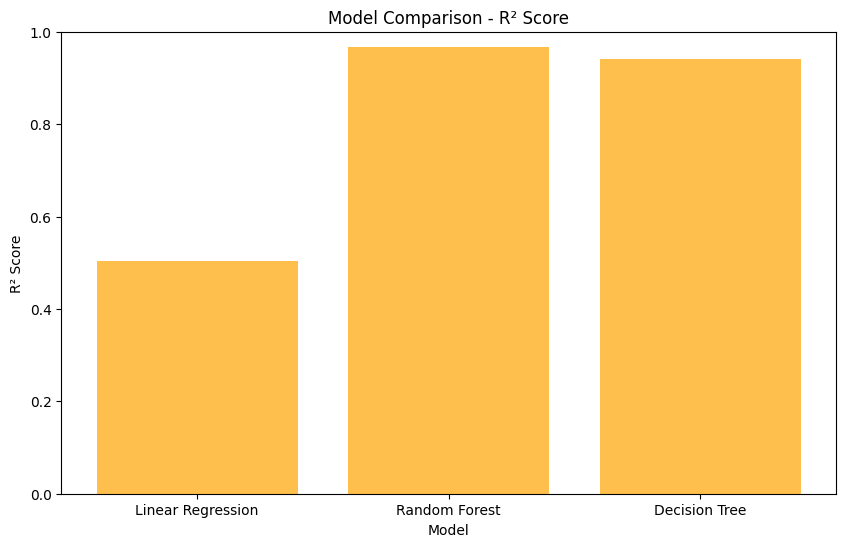

In [93]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree']
mse_values = [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_dt)
]
r2_values = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_dt)
]

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.7, label='MSE')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(models)
plt.show()

# Plot the R² values
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, alpha=0.7, color='orange', label='R² Score')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(models)
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.show()